# Coffee Shop Quality Control — Hypothesis Testing Lab

---

## Business Scenario

A coffee shop advertises that their large iced coffee contains 20 oz on average.

Management wants to verify if the filling machine is meeting this claim.

You are a data scientist hired to analyze measurement data collected from the machine.

---

## Lab Goal

By the end of this lab you will:
- Explore coffee fill measurement data
- Visualize fill distribution
- Estimate machine performance using sample statistics
- Test if the machine is meeting the 20 oz claim
- Interpret statistical results in business context


## Section 0 — Environment Setup

Import numpy, pandas, matplotlib.pyplot, and scipy.stats. Please alias them appropriately

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
print("Imports look right")
print("check imports")

Imports look right
check imports


In [ ]:
try:
    np
    pd
    plt
    stats
    print("Imports look correct")
except:
    print("Check imports")


## Section 1 — Coffee Machine Measurement Data


In [3]:
fills = [
20.120723221444525,19.882691851780855,20.177318275072363,20.50545333469131,19.846746368334827,
19.84675252278817,20.52651437482282,20.222206963311187,19.75853269393313,20.137909253592664,
19.76080313783573,19.75993642655553,20.025225588626615,19.217300020892704,19.287910547376946,
19.723740269909282,19.554847124992662,20.052322747545443,19.594135646143215,19.40509872806296,
20.48394315783849,19.849886642530315,19.95983631505124,19.400433722879246,19.73045215936315,
19.976103362908457,19.503054818214206,20.075358475450212,19.709363751707432,19.825176480099024,
19.708963424722146,20.628877098097963,19.929462695573623,19.538023243416763,20.242865856921934,
19.476870451909548,20.012818044301223,19.199910066293445,19.436631514554463,20.00831877670335,
20.211347810256207,19.99876235336476,19.89116981176798,19.821649018227628,19.380275791266786,
19.664677742839903,19.761844859126306,20.33080074511099,20.063332899261002,19.273619812529322
]

df = pd.DataFrame({"fill_oz": fills})
df.head()


,fill_oz
0,20.120723
1,19.882692
2,20.177318
3,20.505453
4,19.846746


## Section 2 — Sample Statistics

Compute sample_mean, sample_std, and n

In [26]:
# TODO
# naming & storing variables
sample_mean = df["fill_oz"].mean()
sample_std = df["fill_oz"].std()
n = df["fill_oz"].count()
print(sample_mean)
print(sample_std)
print(n)

19.85
0.3500000000000003
50


In [27]:
try:
    assert abs(sample_mean - 19.85) < 0.05
    assert abs(sample_std - 0.35) < 0.05
    assert n == 50
    print("Sample statistics look correct")
except:
    print("Check sample statistics")


Sample statistics look correct


## Section 3 — Distribution Visualization

Create histogram and overlay sample mean

HINT: Look up matplotlib documentation on how to create a histogram. You may want to look up axvline() to include the sample mean overlay

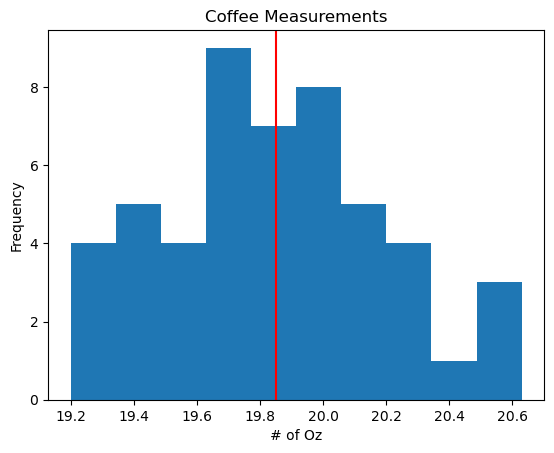

In [31]:
# TODO
plt.hist(df["fill_oz"])
plt.title("Coffee Measurements")
plt.xlabel('# of Oz')
plt.ylabel('Frequency')
plt.axvline(x=sample_mean, color='red')

## Section 4 — Hypothesis Test

H0: Machine average = 20 oz

Compute SE and t_stat

HINT: The t-statistic in a one sample t-test is defined as (sample_mean - pop_mean) / SE

In [ ]:
# TODO


In [ ]:
try:
    assert abs(t_stat) > 2
    print("Test statistic magnitude looks reasonable")
except:
    print("Check t_stat calculation")


## Section 5 — p-value and Decision

Compute two-tailed p_value, where alpha = 0.05


Check out this link on how to calculate the p-value: https://www.statology.org/p-value-from-t-score-python/

Should we use left-tailed test, right-tailed test, or two tailed-test?

HINT: Use stats.t.sf() to determine p_value and don't forget to include your degrees of freedom which you can label as **dfree**

HINT: Try using an if-else statement here to determine whether you should "Reject H0" or "Fail to Reject H0"


In [ ]:
# TODO


A p-value tells us how likely it would be to observe results at least this extreme **if the null hypothesis were true**.

In other words, it measures how surprising our data is assuming there is **no real effect**.

We often compare the p-value to **0.05**, which is a commonly used significance level (alpha).  
Setting alpha to 0.05 means we are willing to accept about a **5% chance of falsely rejecting the null hypothesis** (a Type I error).

If the p-value is less than 0.05, the result is considered statistically significant, and we reject the null hypothesis.  
If the p-value is greater than 0.05, we do not have strong enough evidence to reject the null hypothesis.

In [ ]:
try:
    assert p_value < 0.01
    print("p-value magnitude looks correct")
except:
    print("Check p-value calculation")


## Section 6 — Confidence Interval

Compute 95% confidence interval

ci_lower = sample_mean - margin_error

ci_upper = sample_mean + margin_error

HINT: Recall how we calculate our margin of error with our critical value. I've provided the critical value for you below

In [ ]:
# TODO
t_crit = stats.t.ppf(0.975, dfree)

In [ ]:
try:
    assert ci_upper < 20
    print("Confidence interval looks correct")
except:
    print("Check CI calculation")


## Final Visualization — Rejection Region Using Your Results

In [ ]:
alpha = 0.05
dfree = n - 1

t_crit = stats.t.ppf(1 - alpha/2, dfree)

x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, dfree)

plt.figure(figsize=(10,6))
plt.plot(x, y)

plt.fill_between(x, y, where=(x <= -t_crit), alpha=0.3)
plt.fill_between(x, y, where=(x >= t_crit), alpha=0.3)

plt.axvline(t_stat, linestyle="--", linewidth=2)

plt.title("Coffee Machine Hypothesis Test Visualization")
plt.xlabel("t value")
plt.ylabel("Density")

plt.show()
